In [1]:
print("hello world")

hello world


In [10]:
%pip install torch torchvision torchaudio


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
%pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 2.0 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/8.1 MB 2.0 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 1.9 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.1 MB 2.1 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 MB 2.3 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 MB 2.4 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/8.1 MB 2.5 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 2.6 MB/s eta 0:00:02
   ---------------------------- ----------- 5.8/8.1 MB 2.9 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 3.4 MB/s eta 0:00:00
   -----------------------


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/113.8 MB ? eta -:--:--
    --------------------------------------- 1.8/113.8 MB 7.6 MB/s eta 0:00:15
   - -------------------------------------- 2.9/113.8 MB 5.8 MB/s eta 0:00:20
   - -------------------------------------- 2.9/113.8 MB 5.8 MB/s eta 0:00:20
   - -------------------------------------- 3.4/113.8 MB 3.8 MB/s eta 0:00:29
   - -------------------------------------- 3.4/113.8 MB 3.8 MB/s eta 0:00:29
   -- ------------------------------------- 6.0/113.8 MB 4.6 MB/s eta 0:00:24
   -- ------------------------------------- 7.3/113.8 MB 4.7 MB/s eta 0:00:23
   -- ------------------------------------- 8.1/113.8 MB 4.6 MB/s eta 0:00:23
   --- ------------------------------------ 8.7/113.8 MB 4.4 MB/s eta 0:00:24
   --- ------------------------------------ 9.2/113.8 MB 4.3 MB/s eta 0:00:25
   --- ------------------------------------ 10.5/113.8 MB 4.3 MB/s eta 0:00:24


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [13]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100.0%
c:\Users\Pranad\Desktop\programs\New folder\venv\Lib\site-packages\torchvision\datasets\cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


In [14]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

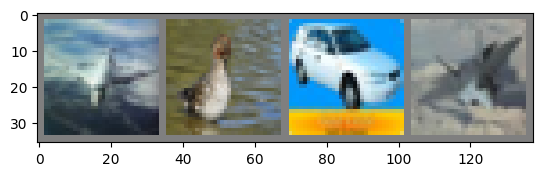

plane bird  car   plane


In [19]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [21]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [22]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
print('Finished Training')


cpu
[1,  2000] loss: 2.171
[1,  4000] loss: 1.837
[1,  6000] loss: 1.647
[1,  8000] loss: 1.550
[1, 10000] loss: 1.504
[1, 12000] loss: 1.466
[2,  2000] loss: 1.380
[2,  4000] loss: 1.375
[2,  6000] loss: 1.341
[2,  8000] loss: 1.321
[2, 10000] loss: 1.304
[2, 12000] loss: 1.274
Finished Training


In [24]:
path = './cifar_net.pth'
torch.save(net.state_dict(), path)

In [25]:
ls

 Volume in drive C is ACER
 Volume Serial Number is 4A5C-9CBA

 Directory of c:\Users\Pranad\Desktop\programs\New folder

18-02-2026  03:59    <DIR>          .
18-02-2026  02:25    <DIR>          ..
18-02-2026  03:59           252,005 cifar_net.pth
18-02-2026  02:55    <DIR>          data
18-02-2026  04:04           128,544 jupfirst.ipynb
18-02-2026  02:35    <DIR>          venv
               2 File(s)        380,549 bytes
               4 Dir(s)  112,921,190,400 bytes free


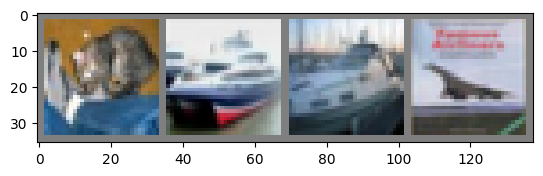

GroundTruth:  cat   ship  ship  plane


In [26]:
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images)) 
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [27]:
net = Net()
net.load_state_dict(torch.load(path))

<All keys matched successfully>

In [28]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)        
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))   

Predicted:  cat   ship  ship  ship 


In [29]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

Accuracy of the network on the 10000 test images: 55.07 %


In [30]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print(f'Accuracy of {classes[i]:5s} : {100 * class_correct[i] / class_total[i]:.2f} %') 

Accuracy of plane : 47.90 %
Accuracy of car   : 58.40 %
Accuracy of bird  : 38.00 %
Accuracy of cat   : 38.10 %
Accuracy of deer  : 59.10 %
Accuracy of dog   : 52.40 %
Accuracy of frog  : 58.70 %
Accuracy of horse : 56.10 %
Accuracy of ship  : 79.40 %
Accuracy of truck : 62.60 %
